In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # train=True 60,000개
val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True) #train=False 10,000개

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 64.5kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.33MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [5]:
# 기본적인 CNN 모델 정의
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = BasicCNN()

In [6]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# 훈련 및 검증 기록을 위한 리스트
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [8]:
# 모델 훈련 함수
def train(model, loader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    return running_loss / total, correct / total

In [9]:
# 모델 검증 함수
def validate(model, loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)

    return running_loss / total, correct / total

In [10]:
# 훈련 루프
epochs = 10
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch 1/10
Train Loss: 0.1559, Train Acc: 0.9533
Val Loss: 0.0453, Val Acc: 0.9847
Epoch 2/10
Train Loss: 0.0453, Train Acc: 0.9860
Val Loss: 0.0355, Val Acc: 0.9882
Epoch 3/10
Train Loss: 0.0318, Train Acc: 0.9899
Val Loss: 0.0370, Val Acc: 0.9884
Epoch 4/10
Train Loss: 0.0234, Train Acc: 0.9925
Val Loss: 0.0366, Val Acc: 0.9898
Epoch 5/10
Train Loss: 0.0169, Train Acc: 0.9946
Val Loss: 0.0344, Val Acc: 0.9895
Epoch 6/10
Train Loss: 0.0123, Train Acc: 0.9962
Val Loss: 0.0359, Val Acc: 0.9896
Epoch 7/10
Train Loss: 0.0106, Train Acc: 0.9964
Val Loss: 0.0343, Val Acc: 0.9906
Epoch 8/10
Train Loss: 0.0099, Train Acc: 0.9968
Val Loss: 0.0335, Val Acc: 0.9905
Epoch 9/10
Train Loss: 0.0090, Train Acc: 0.9969
Val Loss: 0.0384, Val Acc: 0.9889
Epoch 10/10
Train Loss: 0.0067, Train Acc: 0.9975
Val Loss: 0.0398, Val Acc: 0.9892


In [11]:
# Model Save
torch.save(model.state_dict(), 'mnist_cnn_model_10_epoch.pth')

In [ ]:
# Model Load
model.load_state_dict(torch.load('mnist_cnn_model.pth'))

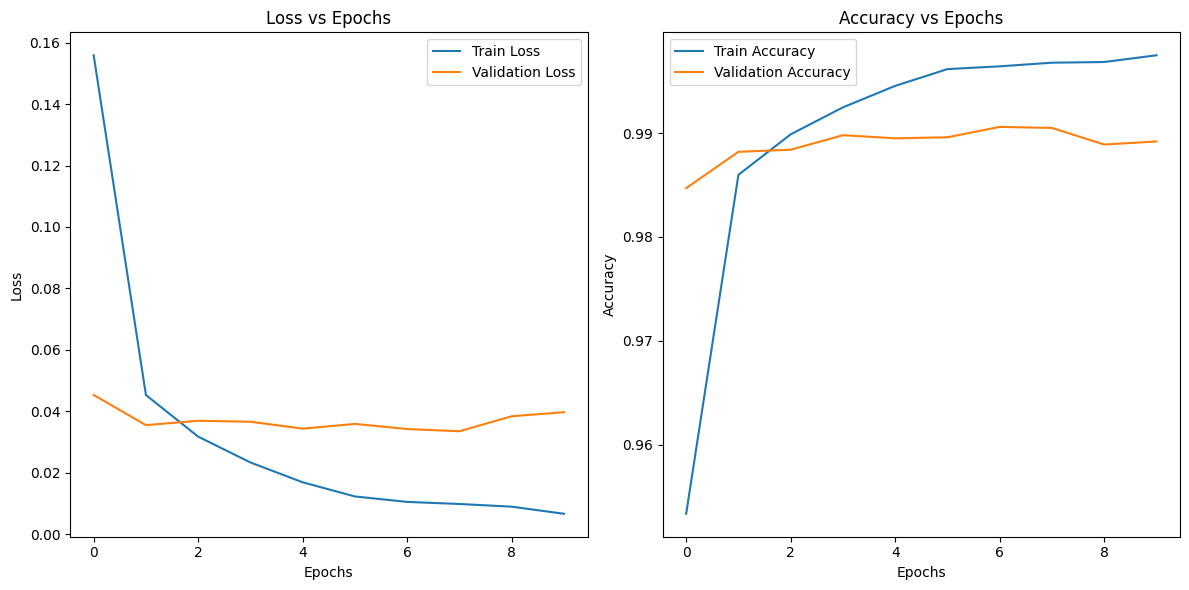

In [12]:
# 시각화
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import torch

In [ ]:
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

In [ ]:
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        # inputs = inputs.to(device)
        # classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # 배치 예측 결과를 추가합니다.
        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

In [ ]:
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 977    0    0    1    0    1    1    0    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   0    1 1024    0    0    0    0    6    1    0]
 [   0    1    1 1000    0    6    0    1    1    0]
 [   0    0    2    0  971    0    0    1    2    6]
 [   1    0    0    6    0  882    1    0    2    0]
 [   2    1    1    0    1    3  944    0    6    0]
 [   0    1    6    0    0    0    0 1018    1    2]
 [   0    0    2    0    0    0    0    0  971    1]
 [   0    3    0    0    4    4    0    4    6  988]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# 실제 라벨과 예측 라벨을 비교하여 성능 보고서를 출력합니다.
print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
def test(model, test_loader):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, preds = torch.max(output, 1)
            all_preds.extend(preds.view(-1).cpu().numpy())
            all_targets.extend(target.view(-1).cpu().numpy())
    return all_targets, all_preds

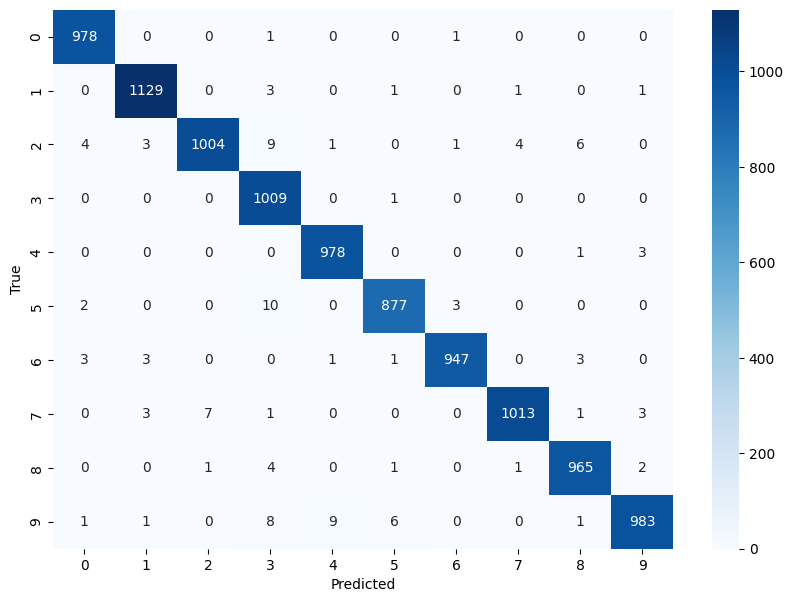

In [ ]:
# 테스트 데이터로 평가
import seaborn as sns

targets, preds = test(model, val_loader)

# Confusion Matrix 시각화
cm = confusion_matrix(targets, preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Classification Report 출력
print(classification_report(targets, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

